[Click](https://click.palletsprojects.com/en/7.x/) is an excellent library that handles a lot of the minutate in setting up a robust Command-Line Interface.

There's a TON of functionality built in, but I'm writing this notebook so I can remember how to set up straight-forward implementations, such as the one found in my library [kneejerk](https://napsterinblue.github.io/kneejerk/)

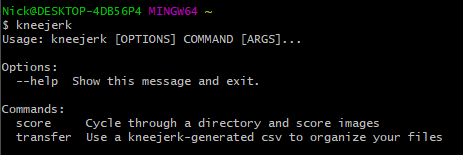

In [1]:
from IPython.display import Image
Image('./images/kneejerk.PNG')

### A Minimal Example

I whipped up a small script that provides an interace to either:

- Convert an ASCII number to its corresponding character
- Convert a character to its corresponding ASCII number

Here it is in its entirety

In [2]:
!cat dumb_cli.py

import click


@click.group()
def main():
    pass

@main.command(help='Take a letter and print its corresponding ascii number')
@click.argument('letter')
def l2n(letter):
    print(ord(letter))

@main.command(help='Take an ascii number and print its corresponding letter')
@click.option('--upper', '-u', help='Print upper-case letter', default=False)
@click.argument('number')
def n2l(number, upper):
    number = int(number)
    if upper:
        print(chr(number).upper())
    else:
        print(chr(number).lower())


if __name__ == '__main__':
    main()


### Multiple Commands

Because we have two functions, we want to have two top-level commands: `l2n` and `n2l`.

This is achieved by using the `@click.group()` decorator on top of a throwaway function, `main()`, which creates a *new* dectorator.

We use the `@main.command()` decorator on top of our `l2n()` and `n2l()` functions.

In [3]:
!python dumb_cli.py

Usage: dumb_cli.py [OPTIONS] COMMAND [ARGS]...

Options:
  --help  Show this message and exit.

Commands:
  l2n  Take a letter and print its corresponding ascii number
  n2l  Take an ascii number and print its corresponding letter


### Customizing Each Command

Notice that in the `@main.command()` call, we provide a `help=` argument, which gives us the nice printout.

From here, we supply the command line options and arguments for each command. Few things to point out:

* We can provide both the long-form `--` and short-form `-` flags
* We can set default values
* We can put help statements for each option

In [4]:
!python dumb_cli.py n2l --help

Usage: dumb_cli.py n2l [OPTIONS] NUMBER

  Take an ascii number and print its corresponding letter

Options:
  -u, --upper TEXT  Print upper-case letter
  --help            Show this message and exit.


### Decorator Organization

Finally, one last note on the execution order. Copy/pasting the decorator and defnition of `n2l()`:

```
@main.command(help='Take an ascii number and print its corresponding letter')
@click.option('--upper', '-u', help='Print upper-case letter', default=False)
@click.argument('number')
def n2l(number, upper):
```

The decorators execute *from the bottom up*, supplying function arguments *from left to right*. Be very careful that these align!